In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
from csv import reader
sns.set_style('white')
sns.set_palette('Set3')
%matplotlib inline
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 100)

/Users/timhsu/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [13]:
sc = SparkContext.getOrCreate()

In [34]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
for i in range(len(tableau20)):
    r,g,b = tableau20[i]
    tableau20[i] = (r/255., g/255., b/255.)

# Restaurant

In [142]:
res_index = pd.read_csv('./restaurant_index.csv')
res_index.columns = ['zipcode','restaurant_amount','area','population','res_index']
res_index.sort_values('res_index', ascending=False)[['zipcode','restaurant_amount','area','res_index']]

,zipcode,restaurant_amount,area,res_index
54,10121,276.0,1.151048e+05,8.475460
73,10176,38.0,1.828909e+04,8.332184
53,10119,217.0,1.263930e+05,8.141404
66,10169,105.0,6.624635e+04,8.061482
65,10168,39.0,2.781012e+04,7.939064
51,10112,205.0,1.640782e+05,7.823569
55,10123,16.0,1.613854e+04,7.592281
46,10105,34.0,3.542216e+04,7.559925
33,10036,9801.0,1.139511e+07,7.450203
2,10003,11698.0,1.553838e+07,7.317007


In [43]:
prec_distrib = pd.read_csv('./precinct_distrib.csv', index_col=0)
prec_distrib = prec_distrib[prec_distrib['count']>80].sort_values('precinct')
prec_distrib.columns = ['precinct','borough','crime_count']
prec_distrib.head()

,precinct,borough,crime_count
72,1,MANHATTAN,61537
15,5,MANHATTAN,44917
30,6,MANHATTAN,54904
81,7,MANHATTAN,40885
74,9,MANHATTAN,62164


In [44]:
prec2zip = pd.read_csv('./precinct2zip.csv', index_col=0)
prec2zip.head()

,precinct,zipcode
0,102,11418
1,40,10454
2,18,10019
3,110,11373
4,78,11217


In [45]:
df = prec_distrib.set_index('precinct').join(prec2zip.set_index('precinct')).reset_index().set_index('zipcode').join(res_index.set_index('zipcode')).reset_index()

Compute a 'crime index' by normalizing the crime count of each area with the area and then taking the log of it. The ratio is scaled the make the numbers look better.

In [46]:
df['crime_index'] = np.log(df['crime_count']/df['area']*50000)

In [47]:
df.head()

,zipcode,precinct,borough,crime_count,restaurant_amount,area,population,res_index,crime_index
0,10001,14,MANHATTAN,119414,7451.0,17794940.77,22413,6.730337,5.815705
1,10002,7,MANHATTAN,40885,7962.0,26280128.54,81305,6.406770,4.353973
2,10003,9,MANHATTAN,62164,11698.0,15538376.27,55878,7.317007,5.298486
3,10010,13,MANHATTAN,74442,3954.0,9768395.57,29881,6.696478,5.942891
4,10011,10,MANHATTAN,43479,7525.0,18118416.85,50594,6.722204,4.787372


In [63]:
corr = np.corrcoef(df['res_index'],df['crime_index'])
corr

array([[ 1.        ,  0.61394731],
       [ 0.61394731,  1.        ]])

In [144]:
df.shape

(77, 9)

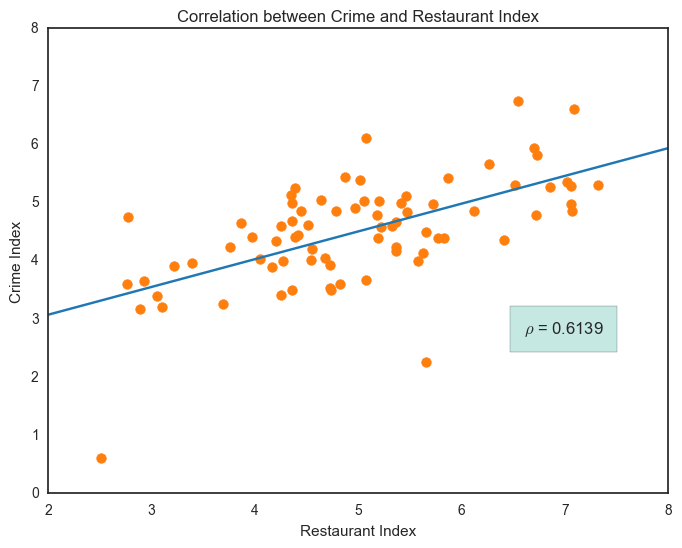

In [220]:
plt.figure(figsize=(8,6))
fit = np.polyfit(df['res_index'],df['crime_index'],1)
fit_fn = np.poly1d(fit) 
plt.scatter(df['res_index'],df['crime_index'], color=tableau20[2], s=50)
plt.plot(np.linspace(2,8),fit_fn(np.linspace(2,8)), color=tableau20[0])
plt.xlim(2,8)
plt.text(6.6, 2.75, r'$\rho$ = %.4f'%np.corrcoef(df['res_index'],df['crime_index'])[0,1], fontsize=12,
        bbox={'alpha':0.5, 'pad':10})
plt.xlabel('Restaurant Index')
plt.ylabel('Crime Index')
plt.title('Correlation between Crime and Restaurant Index')

In [161]:
corr = np.corrcoef(np.log(df['population']*1000000/df['area']),df['crime_index'])

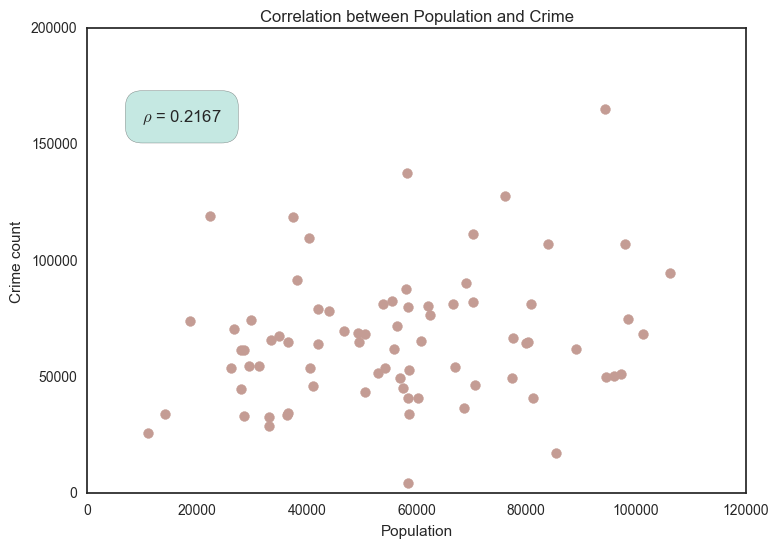

In [190]:
plt.figure(figsize=(8.5,6))
plt.scatter(df['population'],df['crime_count'],color=tableau20[11], s=50)
plt.xlabel('Population')
plt.ylabel('Crime count')
plt.text(10000, 160000, r'$\rho$ = %.4f'%np.corrcoef(df['population'], df['crime_count'])[0,1], fontsize=12,
        bbox={'alpha':0.5, 'pad':1, 'boxstyle': 'round'})
plt.xlim(0,)
plt.ylim(0,)
plt.title('Correlation between Population and Crime')

In [201]:
df['pop_index'] = np.log(df['population']*100000/df['area'])

array([[ 1.        , -0.05357715],
       [-0.05357715,  1.        ]])

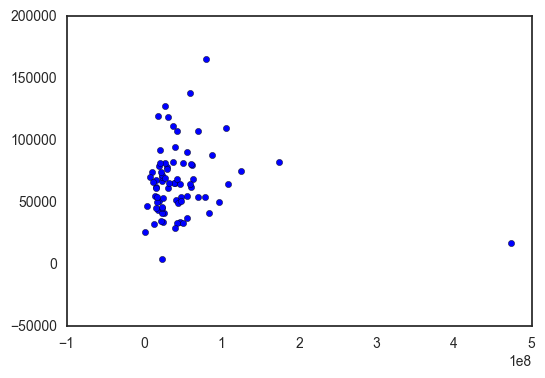

In [212]:
plt.scatter(df['area'], df['crime_count'])
np.corrcoef(df['area'], df['crime_count'])

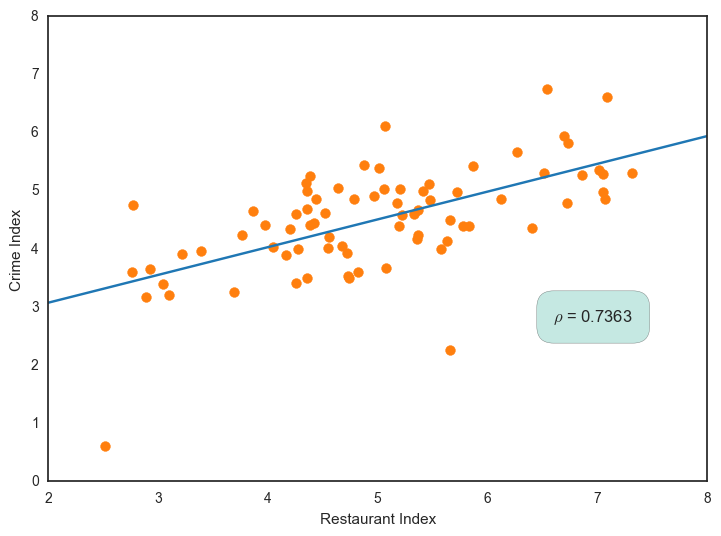

In [191]:
plt.figure(figsize=(8.5,6))
fit = np.polyfit(df['res_index'],df['crime_index'],1)
fit_fn = np.poly1d(fit) 
plt.scatter(df['res_index'],df['crime_index'], color=tableau20[2], s=50)
plt.plot(np.linspace(2,8),fit_fn(np.linspace(2,8)), color=tableau20[0])
plt.xlim(2,8)
plt.text(6.6, 2.75, r'$\rho$ = %.4f'%corr[0,1], fontsize=12,
        bbox={'alpha':0.5, 'pad':1, 'boxstyle': 'round'})
plt.xlabel('Restaurant Index')
plt.ylabel('Crime Index')

# Weather

In [3]:
weather = pd.read_csv('./weather.txt', encoding='utf-8')
weather.head()

,STN---,WBAN,YEARMODA,TEMP,,DEWP,.1,SLP,.2,STP,.3,VISIB,.4,WDSP,.5,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Unnamed: 22
0,725030,14732,20060101,35.9,24,30.1,24,1014.8,23,1013.2,24,8.6,24,4.8,24,8.9,999.9,43.0,32.0,0.14G,999.9,0,NaN
1,725030,14732,20060102,42.6,24,32.3,24,1022.3,24,1021.4,24,9.0,24,3.8,24,10.9,999.9,46.9,33.1,0.00G,999.9,10000,NaN
2,725030,14732,20060103,39.2,24,35.4,24,1013.3,24,1012.1,24,5.6,24,16.9,24,24.9,31.7,46.9,36.0,1.24G,999.9,11000,NaN
3,725030,14732,20060104,33.8,24,25.2,24,1016.6,24,1015.6,24,10.0,24,9.1,24,12.0,16.9,41.0,28.9,0.23G,999.9,10000,NaN
4,725030,14732,20060105,41.6,24,34.3,24,1006.9,20,1005.8,24,7.4,24,7.4,24,15.0,18.8,50.0,28.9,0.07G,999.9,10000,NaN


In [4]:
weather.columns

Index([     u'STN---',       u'WBAN ',   u' YEARMODA',     u'   TEMP',
                u'  ',     u'   DEWP',        u'  .1',     u'  SLP  ',
              u'  .2',     u'  STP  ',        u'  .3',      u' VISIB',
              u'  .4',      u'  WDSP',        u'  .5',      u' MXSPD',
            u'  GUST',    u'   MAX  ',     u'  MIN  ',      u'PRCP  ',
             u'SNDP ',     u' FRSHTT', u'Unnamed: 22'],
      dtype='object')

In [5]:
# clean up column names for better processing
weather.columns = [str(col).strip() for col in weather.columns]
weather.columns

Index([u'STN---', u'WBAN', u'YEARMODA', u'TEMP', u'', u'DEWP', u'.1', u'SLP',
       u'.2', u'STP', u'.3', u'VISIB', u'.4', u'WDSP', u'.5', u'MXSPD',
       u'GUST', u'MAX', u'MIN', u'PRCP', u'SNDP', u'FRSHTT', u'Unnamed: 22'],
      dtype='object')

Next, we will prepare to join the murder data with the weather data to find the temperature of each day of murder occurence. To achieve better visualizations, it might be a good idea to round the temperatures, for example, to the nearest 5. Also, to join the tables, we need to transform the date so that the two dataset have the same format for dates.

In [6]:
# get one date to test
sample_date = str(weather['YEARMODA'][52])
sample_date

'20060222'

In [7]:
sample_date[4:6]+'/'+sample_date[6:]+'/'+sample_date[:4]

'02/22/2006'

In [8]:
weather['YEARMODA'] = [date[4:6]+'/'+date[6:]+'/'+date[:4] for date in weather['YEARMODA'].astype(str)]
weather.head()

,STN---,WBAN,YEARMODA,TEMP,,DEWP,.1,SLP,.2,STP,.3,VISIB,.4,WDSP,.5,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Unnamed: 22
0,725030,14732,01/01/2006,35.9,24,30.1,24,1014.8,23,1013.2,24,8.6,24,4.8,24,8.9,999.9,43.0,32.0,0.14G,999.9,0,NaN
1,725030,14732,01/02/2006,42.6,24,32.3,24,1022.3,24,1021.4,24,9.0,24,3.8,24,10.9,999.9,46.9,33.1,0.00G,999.9,10000,NaN
2,725030,14732,01/03/2006,39.2,24,35.4,24,1013.3,24,1012.1,24,5.6,24,16.9,24,24.9,31.7,46.9,36.0,1.24G,999.9,11000,NaN
3,725030,14732,01/04/2006,33.8,24,25.2,24,1016.6,24,1015.6,24,10.0,24,9.1,24,12.0,16.9,41.0,28.9,0.23G,999.9,10000,NaN
4,725030,14732,01/05/2006,41.6,24,34.3,24,1006.9,20,1005.8,24,7.4,24,7.4,24,15.0,18.8,50.0,28.9,0.07G,999.9,10000,NaN


In [248]:
# round temperatures to nearest 5's
def round_num(num, base=5):
    return int(base * round(float(num)/base))
round_num(13)

15

In [249]:
weather['TEMP'] = [round_num(temp) for temp in weather['TEMP']]
weather.head()

,STN---,WBAN,YEARMODA,TEMP,,DEWP,.1,SLP,.2,STP,.3,VISIB,.4,WDSP,.5,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Unnamed: 22
0,725030,14732,01/01/2006,35,24,30.1,24,1014.8,23,1013.2,24,8.6,24,4.8,24,8.9,999.9,43.0,32.0,0.14G,999.9,0,NaN
1,725030,14732,01/02/2006,45,24,32.3,24,1022.3,24,1021.4,24,9.0,24,3.8,24,10.9,999.9,46.9,33.1,0.00G,999.9,10000,NaN
2,725030,14732,01/03/2006,40,24,35.4,24,1013.3,24,1012.1,24,5.6,24,16.9,24,24.9,31.7,46.9,36.0,1.24G,999.9,11000,NaN
3,725030,14732,01/04/2006,35,24,25.2,24,1016.6,24,1015.6,24,10.0,24,9.1,24,12.0,16.9,41.0,28.9,0.23G,999.9,10000,NaN
4,725030,14732,01/05/2006,40,24,34.3,24,1006.9,20,1005.8,24,7.4,24,7.4,24,15.0,18.8,50.0,28.9,0.07G,999.9,10000,NaN


In [10]:
weather.shape

(8552, 23)

In [11]:
weather['TEMP'].describe()

count    8552.000000
mean       55.692142
std        16.978055
min         9.800000
25%        42.200000
50%        56.700000
75%        70.800000
max        93.100000
Name: TEMP, dtype: float64

No missing data for temperature. Also the temperature ranges from 9.8 to 93.1, so it's probably in Fahrenheit.

In [14]:
weather_rdd = sc.parallelize(weather.as_matrix()) \
                .map(lambda x: (x[2], x[3]))

In [99]:
pd.DataFrame(weather_rdd.take(5))

,0,1
0,01/01/2006,35.9
1,01/02/2006,42.6
2,01/03/2006,39.2
3,01/04/2006,33.8
4,01/05/2006,41.6


In [107]:
nearest_5_weather = [round_num(temp) for temp in pd.DataFrame(weather_rdd.map(lambda x: x[1]).collect()).as_matrix()]

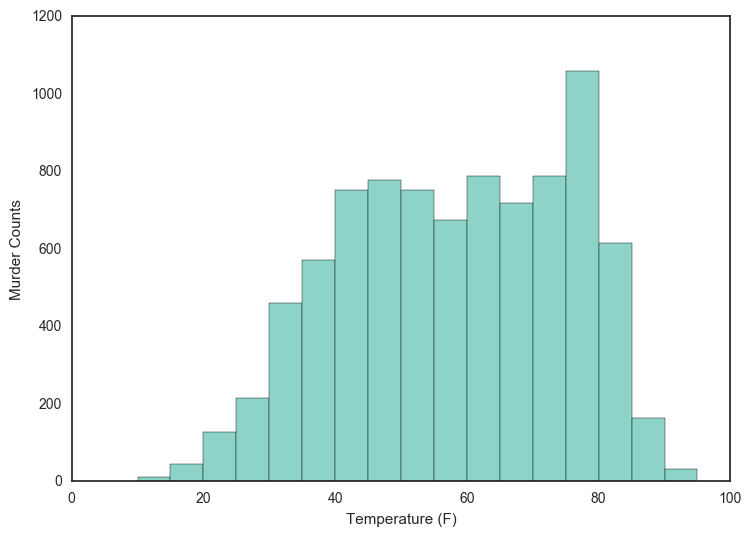

In [247]:
plt.figure(figsize=(8.5,6))
counts = plt.hist(nearest_5_weather,bins=18,range=(5,95))[0]
plt.xlabel('Temperature (F)')
plt.ylabel('Murder Counts')

In [16]:
data = sc.textFile('./NYPD_Complaint_Data_Historic.csv',1) \
         .mapPartitions(lambda x: reader(x))

In [17]:
header = data.first()
data = data.filter(lambda x: x!=header)
pd.DataFrame(data.take(5), columns=header)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,,,12/31/2015,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44,INSIDE,BAR/NIGHT CLUB,,,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,,,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,,,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103,OUTSIDE,,,,1043991,193406,40.697338138,-73.784556739,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,,,12/31/2015,117,DANGEROUS DRUGS,503,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28,,OTHER,,,999463,231690,40.802606608,-73.945051911,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,,,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105,INSIDE,RESIDENCE-HOUSE,,,1060183,177862,40.654549444,-73.726338791,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13,FRONT OF,OTHER,,,987606,208148,40.7380024,-73.98789129,"(40.7380024, -73.98789129)"


In [18]:
# total number of murders
murder_rdd = data.filter(lambda x: x[6]=='101') \
              .map(lambda x: (x[1], x[7]))

In [19]:
pd.DataFrame(murder_rdd.take(5))

,0,1
0,12/31/2015,MURDER & NON-NEGL. MANSLAUGHTER
1,12/17/2004,MURDER & NON-NEGL. MANSLAUGHTER
2,12/30/2015,MURDER & NON-NEGL. MANSLAUGHTER
3,07/21/1992,MURDER & NON-NEGL. MANSLAUGHTER
4,10/01/1969,MURDER & NON-NEGL. MANSLAUGHTER


In [20]:
print('There were %d murders in total from 2006 to 2016.' % murder_rdd.count())

There were 4574 murders in total from 2006 to 2016.


Next, we will join the two RDDs, weather and murder, using Spark. They will be joined on their mutual key, the reformatted date.

In [23]:
weather_murder_rdd = weather_rdd.join(murder_rdd)

In [24]:
weather_murder_rdd.take(10)

[('04/08/2009', (42.1, 'MURDER & NON-NEGL. MANSLAUGHTER')),
 ('04/08/2009', (42.7, 'MURDER & NON-NEGL. MANSLAUGHTER')),
 ('07/11/2011', (82.0, 'MURDER & NON-NEGL. MANSLAUGHTER')),
 ('07/11/2011', (78.8, 'MURDER & NON-NEGL. MANSLAUGHTER')),
 ('07/19/2015', (84.3, 'MURDER & NON-NEGL. MANSLAUGHTER')),
 ('07/19/2015', (84.3, 'MURDER & NON-NEGL. MANSLAUGHTER')),
 ('07/19/2015', (84.3, 'MURDER & NON-NEGL. MANSLAUGHTER')),
 ('07/19/2015', (84.9, 'MURDER & NON-NEGL. MANSLAUGHTER')),
 ('07/19/2015', (84.9, 'MURDER & NON-NEGL. MANSLAUGHTER')),
 ('07/19/2015', (84.9, 'MURDER & NON-NEGL. MANSLAUGHTER'))]

In [117]:
# get temperatures
temps = [round_num(temp) for temp in weather_murder_rdd.map(lambda x: x[1][0]).collect()]

In [128]:
temps = (np.histogram(temps,bins=18,range=(5,95))[0]/counts)[1:]

In [130]:
temps

array([ 1.        ,  1.04545455,  0.875     ,  0.73148148,  1.00869565,
        1.01923077,  1.01062417,  1.1042471 ,  1.1462766 ,  1.18397626,
        1.01013942,  1.12795549,  1.30076142,  1.47214353,  1.43089431,
        1.65243902,  1.25      ])

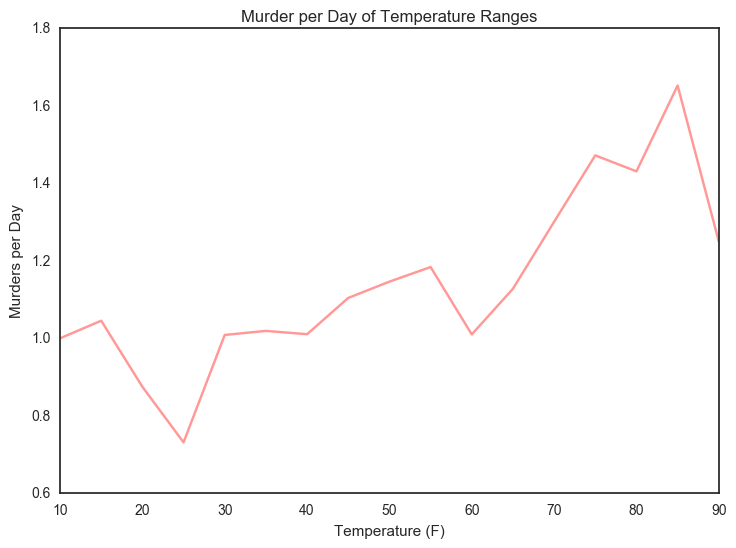

In [246]:
plt.figure(figsize=(8.5,6))
plt.plot(np.arange(10,95,5), temps, color=tableau20[7])
plt.xlim(10,90)
plt.xlabel('Temperature (F)')
plt.ylabel('Murders per Day')
plt.title('Murder per Day of Temperature Ranges')